In [1]:
import sys
sys.path.insert(0, "/raid/mohamed/siim-isic-melanoma-classification")
import pandas as pd
import numpy as np

In [2]:
# load training dataframe
train = pd.read_csv('../data/train.csv')
train.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')

**Hot encoding of metadata**

In [3]:
onehot = pd.get_dummies(train[['sex', 'anatom_site_general_challenge']])
age_mean = train['age_approx'].mean()
age_mean

48.87001633492649

In [4]:
train.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')

In [5]:
#train.drop(['sex', 'anatom_site_general_challenge'], axis=1, inplace=True)

In [6]:
#train = train.join(onehot)

**Normalize the age**

In [7]:
#train['age_approx'] = train['age_approx'] / age_mean

In [8]:
#train.columns

**Get positive and negative samples**

In [9]:
I = train['target']==1
df_pos = train[I]
df_neg = train[~I]

In [11]:
df_pos.to_csv('../data/df_pos.csv', index=None)
df_neg.to_csv('../data/df_neg.csv', index=None)

In [13]:
df_neg['age_approx'].mean(), df_pos['age_approx'].mean()

(48.703424277883848, 58.13356164383562)

In [18]:
df_neg['sex'].value_counts()

male      16716
female    15761
Name: sex, dtype: int64

In [19]:
16716/15761

1.0605926019922594

In [20]:
df_pos['sex'].value_counts()

male      364
female    220
Name: sex, dtype: int64

In [21]:
364/220

1.6545454545454545

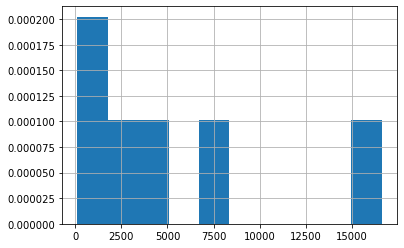

In [25]:
df_neg['anatom_site_general_challenge'].value_counts().hist(density=True)

In [32]:
len(df_neg), len(df_pos)

(32542, 584)

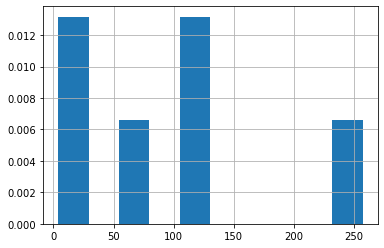

In [26]:
df_pos['anatom_site_general_challenge'].value_counts().hist(density=True)

**Split positive and negative samples separtly**

In [45]:
np.random.seed(0)
def split(df):
    train_, val_, test_ = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
    return train_, val_, test_

In [46]:
train_pos, val_pos, test_pos = split(df_pos)
train_neg, val_neg, test_neg = split(df_neg)

In [47]:
val_pos.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
12991,ISIC_3996796,IP_2412574,male,70.0,torso,melanoma,malignant,1
7737,ISIC_2412113,IP_2025600,female,45.0,upper extremity,melanoma,malignant,1
2485,ISIC_0844312,IP_9936643,male,75.0,head/neck,melanoma,malignant,1
5443,ISIC_1729223,IP_4772390,male,60.0,torso,melanoma,malignant,1
16895,ISIC_5166798,IP_9927968,male,25.0,torso,melanoma,malignant,1


**Merge frames**

In [51]:
def merge(pos, neg):
    df = pd.concat([pos, neg], ignore_index=True)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [55]:
df_train = merge(train_pos, train_neg)
df_val = merge(val_pos, val_neg)
df_test = merge(test_pos, test_neg)

In [58]:
df_test

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_6186492,IP_2290360,male,50.0,head/neck,nevus,benign,0
1,ISIC_8628639,IP_9086201,female,40.0,torso,nevus,benign,0
2,ISIC_0302804,IP_1676499,female,30.0,lower extremity,unknown,benign,0
3,ISIC_1929654,IP_6709202,female,55.0,torso,unknown,benign,0
4,ISIC_6814294,IP_7890415,male,60.0,torso,unknown,benign,0
...,...,...,...,...,...,...,...,...
6621,ISIC_1780417,IP_5974691,female,35.0,torso,unknown,benign,0
6622,ISIC_2019386,IP_6242332,male,60.0,upper extremity,unknown,benign,0
6623,ISIC_7509284,IP_4353359,male,85.0,lower extremity,nevus,benign,0
6624,ISIC_9402263,IP_8663649,male,45.0,lower extremity,unknown,benign,0


In [59]:
len(train)

33126

In [60]:
len(df_train) + len(df_val) + len(df_test)

33126

In [62]:
df_train.to_csv('../data/train_split.csv', index=None)
df_test.to_csv('../data/test_split.csv', index=None)
df_val.to_csv('../data/val_split.csv', index=None)

In [63]:
import torch
torch.cuda.empty_cache()

In [4]:
I = train['target']==1

In [5]:
I.sum()

584

In [6]:
32542/32

1016.9375